In [2]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np

# Set up date range for stock return

In [4]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*5)
endDate, startDate

(datetime.datetime(2024, 6, 7, 21, 15, 57, 694933),
 datetime.datetime(2019, 6, 9, 21, 15, 57, 694933))

# Create a list of Stocks

In [5]:
stocks = ['MSFT', 'SPY', 'QQQ']

# Download stock data

In [8]:
df = yf.download(stocks, start=startDate, end=endDate)

[*********************100%%**********************]  3 of 3 completed


In [9]:
df.head(2)

Price        Adj Close                               Close              \
Ticker            MSFT         QQQ         SPY        MSFT         QQQ   
Date                                                                     
2019-06-10  126.460022  177.307220  266.649567  132.600006  183.149994   
2019-06-11  125.983192  177.549225  266.584869  132.100006  183.399994   

Price                         High                                 Low  \
Ticker             SPY        MSFT         QQQ         SPY        MSFT   
Date                                                                     
2019-06-10  288.970001  134.080002  184.850006  290.820007  132.000000   
2019-06-11  288.899994  134.240005  185.399994  291.399994  131.279999   

Price                                     Open                          \
Ticker             QQQ         SPY        MSFT         QQQ         SPY   
Date                                                                     
2019-06-10  182.210007  288.869995  132.399994  182.250000  289.369995   
2019-06-11  182.779999  288.179993  133.880005  185.059998  290.989990   

Price         Volume                      
Ticker          MSFT       QQQ       SPY  
Date                                      
2019-06-10  26477100  41385300  60799100  
2019-06-11  23913700  41260300  58641300

# Filter on indicator
- __Adjusted close Vs. Close stock price :__ While the closing price simply refers to the cost of shares at the end of the day, the adjusted closing price takes dividends, stock splits, and new stock offerings into account.

In [10]:
adjusted_close_prices = df['Adj Close']

In [12]:
adjusted_close_prices.head(2)

Ticker,MSFT,QQQ,SPY
Date,,,
2019-06-10,126.460022,177.307220,266.649567
2019-06-11,125.983192,177.549225,266.584869


# Caculate daily returns
Daily returns : calculating ln of the daily returns because additive law

On prend le logarithme du ratio entre la valeur n et la valeur (n-1).

In [13]:
log_returns = np.log(adjusted_close_prices/adjusted_close_prices.shift(1))
log_returns.head(2)

Ticker,MSFT,QQQ,SPY
Date,,,
2019-06-10,NaN,NaN,NaN
2019-06-11,-0.003778,0.001364,-0.000243


# Calculate cumulative returns

In [14]:
cumulative_log_returns = log_returns.cumsum()

# Plot cumulative returns

The return we would have had, if we had invested five years ago.

<Axes: title={'center': 'Cumulative returns'}, xlabel='Date'>

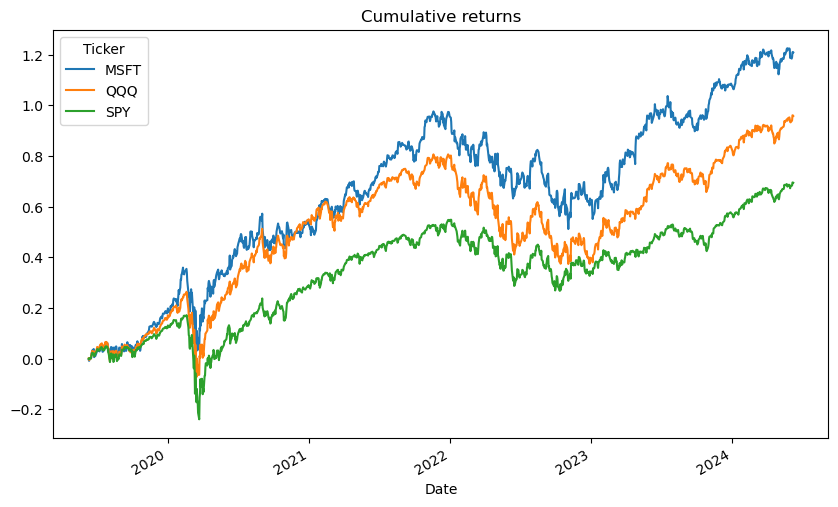

In [15]:
cumulative_log_returns.plot(title="Cumulative returns", figsize=(10,6))

Ce graphique permet de visualiser le gain relatif realise par une action depuis 5 ans.

Notez le creux apres 2020 : La COVID !

# Calculate stock beta

Le Bêta est un outil de mesure du risque d'un actif notamment utilisé dans le modèle d'évaluation du CAPM. On l'utilisera entre autres pour mettre en place des stratégies de limitation des risques.

Le principe de cet outil est de comparer les mouvements effectués par un actif par rapport à son marché de référence, ce qui permet de déterminer son niveau de risque par rapport aux autres actifs de référence. La mesure est effectuée en comparant la rentabilité de l'actif à celle du marché. On peut aussi réduire le marché à un indice boursier (CAC 40, Dow Jones, etc.)

Mathématiquement, le Bêta de l'actif financier se définit comme le rapport de la covariance de la rentabilité de l'actif avec celle du marché à la variance de la rentabilité du marché.

[source](https://www.abcbourse.com/apprendre/19_beta.html)

- CAC40 : Indice boursier France
- SBF 120 : CAC40 etendu
- SPY : Indice boursier USA
- AEX : Indice boursier europeen (Amsterdam)
- Bel 20 : Indice boursier europee (Brussels)

In [99]:
def calculate_beta(stock_index_return, stock_return) :
    covariance = np.cov(stock_return, stock_index_return)
    variance = np.var(stock_index_return)
    return covariance[0,1] / variance

[ref.](https://github.com/sammuharem/beta-calculator/blob/main/Stock%20Beta%20Calculator.py)

In [100]:
index_CAC40 = ['^FCHI'] # CAC40, SBF 120('^SBF120' introuvable sur yfinance)
index_SBF120 = ['^SBF120']
index_AEX = ['AEX']
index_BEL20 = ['^BFX']
index_US = ['SPY']

In [101]:
index = index_US

In [102]:
tick_stocks = ['MSFT']

In [103]:
stocks_beta = index+tick_stocks

In [104]:
stocks_beta

['SPY', 'MSFT']

In [105]:
df = yf.download(stocks_beta, start=startDate, end=endDate)

[*********************100%%**********************]  2 of 2 completed


In [106]:
beta_adjusted_close_prices = df['Adj Close']

In [107]:
beta_adjusted_close_prices.head(2)

Ticker,MSFT,SPY
Date,,
2019-06-10,126.460045,266.649567
2019-06-11,125.983192,266.584930


In [108]:
# Standard daily return
beta_daily_returns = (beta_adjusted_close_prices - beta_adjusted_close_prices.shift(1))/beta_adjusted_close_prices.shift(1)
beta_daily_returns.head(2)

Ticker,MSFT,SPY
Date,,
2019-06-10,NaN,NaN
2019-06-11,-0.003771,-0.000242


Concrètement, prenons l'exemple d'une action du CAC 40 qui possède un Bêta de 1,8. Cela signifie que si l'indice CAC 40 varie de 10%, l'action devrait théoriquement varier de 18%, elle amplifiera donc les mouvements du marché puisque son Bêta est supérieur à 1.

A l'inverse, si une action a un Bêta de 0,7, elle variera moins violemment que son marché de référence : si le CAC 40 varie de 10%, elle devrait effectuer un mouvement de 7% seulement.

On peut aussi rencontrer d'autres situations. Par exemple un coefficient Bêta négatif signifiera que l'action évolue en sens inverse de son marché. Si le Bêta est égal à 0, cela indique que l'actif et son marché ne sont pas du tout corrélés, leurs variations sont totalement indépendantes.

In [110]:
# Remove empty cells
beta_daily_returns = beta_daily_returns.dropna()
beta = calculate_beta(beta_daily_returns[index[0]], beta_daily_returns[tick_stocks[0]])
beta

1.1968226064511407

__N.B :__ La valeur du Beta est elle aussi temporelle. Elle peut influencer l'achat. Mais ses fluctuations au sein du portefeuille doivent etre etudiees.

# Calculate Sharpe Ratio

Risk free rate will have a fixed value.

TODO